In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
dados_credito = pd.read_csv('Training_dataset_Original.csv')
dicionario_dados = pd.read_csv('Data_Dictionary.csv')

dados_credito = dados_credito.drop('index', axis = 1)
dados_credito.columns = dicionario_dados['Definition']

In [3]:
query = dados_credito[['Application ID (primary key)', 'Indicator for default',
                  
                  "Credit worthiness score calculated on the basis of borrower's credit history",
                  'Sum of amount due on active credit cards (in $)',
                  'Annual income (in $)',
                  'Estimated market value of a properety owned/used by the borrower (in $)',
                  'Maximum of credit available on all active credit lines (in $)',
                  'Number of active credit cards on which full credit limit is utilized by the borrower',
                  'Average utilization of line on all active credit cards activated in last 1 year (%)',
]]

query

Definition,Application ID (primary key),Indicator for default,Credit worthiness score calculated on the basis of borrower's credit history,Sum of amount due on active credit cards (in $),Annual income (in $),Estimated market value of a properety owned/used by the borrower (in $),Maximum of credit available on all active credit lines (in $),Number of active credit cards on which full credit limit is utilized by the borrower,Average utilization of line on all active credit cards activated in last 1 year (%)
0,230032,0,1696,6423,123875,missing,6015,1,NaN
1,230033,1,1846,765,42613,missing,7532,0,953.06
2,230034,1,1745,missing,76109,missing,2536,na,NaN
3,230035,0,1739,0,84235,missing,26440,0,NaN
4,230036,0,1787,2257,123875,524848,5494,0,NaN
...,...,...,...,...,...,...,...,...,...
79995,310027,0,1736,11791,247750,missing,4248,0,8128.24
79996,310028,0,1724,2310,77298,missing,64041,0,NaN
79997,310029,1,1605,269,11892,missing,2277,na,NaN
79998,310030,0,1780,2665,84235,missing,6356,1,1006.15


In [4]:
query = query.rename(columns = {

                  'Application ID (primary key)':'id', 
                  'Indicator for default':'default',
                  
                  "Credit worthiness score calculated on the basis of borrower's credit history":'historic_credit_score',
                  'Sum of amount due on active credit cards (in $)':'total_credit_cards_amount',
                  'Annual income (in $)':'annual_income',
                  'Estimated market value of a properety owned/used by the borrower (in $)':'collateral_mkt_value',
                  'Number of active credit cards on which full credit limit is utilized by the borrower':'number_cards_w_limit_fully_used',
                  'Maximum of credit available on all active credit lines (in $)':'credit_limit',
                  'Average utilization of line on all active credit cards activated in last 1 year (%)':'avg_card_utilization_last_1y'
})

query

Definition,id,default,historic_credit_score,total_credit_cards_amount,annual_income,collateral_mkt_value,credit_limit,number_cards_w_limit_fully_used,avg_card_utilization_last_1y
0,230032,0,1696,6423,123875,missing,6015,1,NaN
1,230033,1,1846,765,42613,missing,7532,0,953.06
2,230034,1,1745,missing,76109,missing,2536,na,NaN
3,230035,0,1739,0,84235,missing,26440,0,NaN
4,230036,0,1787,2257,123875,524848,5494,0,NaN
...,...,...,...,...,...,...,...,...,...
79995,310027,0,1736,11791,247750,missing,4248,0,8128.24
79996,310028,0,1724,2310,77298,missing,64041,0,NaN
79997,310029,1,1605,269,11892,missing,2277,na,NaN
79998,310030,0,1780,2665,84235,missing,6356,1,1006.15


In [5]:
query.loc[(query.historic_credit_score == 'na'), 'historic_credit_score'] = 0
query['historic_credit_score'] = query['historic_credit_score'].astype(int)

query.loc[(query.total_credit_cards_amount == 'na'), 'total_credit_cards_amount'] = 0
query.loc[(query.total_credit_cards_amount == 'missing'), 'total_credit_cards_amount'] = 0
query['total_credit_cards_amount'] = query['total_credit_cards_amount'].astype(int)

query['annual_income'] = query['annual_income'].astype(int)

query.loc[query.credit_limit == 'missing', 'credit_limit'] = 0
query['credit_limit'] = query['credit_limit'].astype(int)

query.loc[query.number_cards_w_limit_fully_used == 'na', 'number_cards_w_limit_fully_used'] = 0
query['number_cards_w_limit_fully_used'] = query['number_cards_w_limit_fully_used'].astype(int)

query['avg_card_utilization_last_1y'] = query['avg_card_utilization_last_1y'].fillna(0)
query['avg_card_utilization_last_1y'] = query['avg_card_utilization_last_1y'].astype(int)

query['collateral_mkt_value'] = query['collateral_mkt_value'].replace('missing', 0)

query = query.drop(['id'], axis=1)

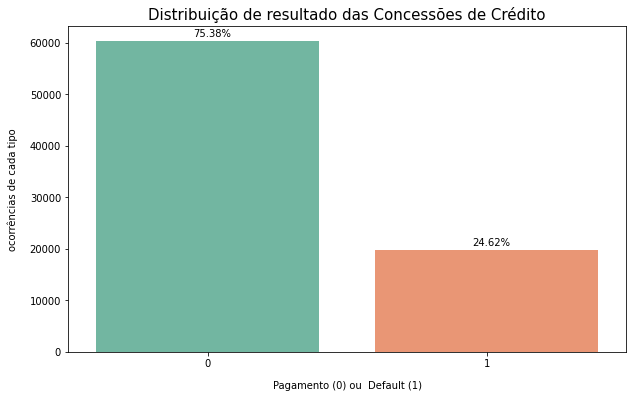

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.countplot(query.default, palette='Set2')
ax.set_title('Distribuição de resultado das Concessões de Crédito', fontsize = 15)
ax.set_xlabel("Pagamento (0) ou  Default (1)", labelpad=12)
ax.set_ylabel("ocorrências de cada tipo", labelpad=12)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(query.default)), (p.get_x()+ 0.35, p.get_height()+1000))

plt.show()

In [7]:
Y = query['default'].copy()
X = query.drop('default', axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

escalador_treino = StandardScaler()
escalador_teste = StandardScaler()

X_train = pd.DataFrame(escalador_treino.fit_transform(X_train), columns=X.columns) #só precisamos escalar o X pq o Y é 0 ou 1. 
X_test = pd.DataFrame(escalador_teste.fit_transform(X_test), columns=X.columns)

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

prevendo_defaults = modelo.predict(X_test)
acertos = accuracy_score(y_test.values, prevendo_defaults)

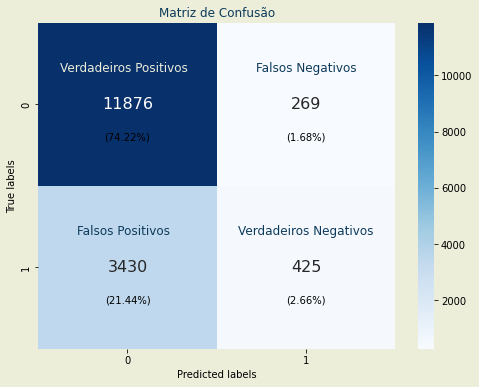

In [8]:
cm = confusion_matrix(y_test.values, prevendo_defaults)
cm_percentual = cm / cm.sum() * 100  # Convertendo para percentuais

fig, ax = plt.subplots(figsize=(8, 6), facecolor='#eceeda')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

ax.text(0.24, 0.85, 'Verdadeiros Positivos', color='#eceeda', fontsize=12, ha='center', transform=plt.gca().transAxes)
ax.text(0.24, 0.35, 'Falsos Positivos', color='#0e3b5b', fontsize=12, ha='center', transform=plt.gca().transAxes)
ax.text(0.75, 0.85, 'Falsos Negativos', color='#0e3b5b', fontsize=12, ha='center', transform=plt.gca().transAxes)
ax.text(0.75, 0.35, 'Verdadeiros Negativos', color='#0e3b5b', fontsize=12, ha='center', transform=plt.gca().transAxes)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.7, f'({cm_percentual[i, j]:.2f}%)', color='Black',
                 ha='center', va='center')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Matriz de Confusão', color='#0e3b5b')

plt.show()

In [9]:
erros = pd.DataFrame(query.groupby('default')['default'].sum())
numero_de_erros = erros.loc[1,'default']

eficacia_banco = round((1 - (numero_de_erros/len(query)))*100,4)
eficacia_modelo = round(acertos*100,4)

alfa_modelo = eficacia_modelo/eficacia_banco -1
alfa_modelo = round(alfa_modelo*100,4)

def verificar_sinal(alfa):
    if alfa > 0:
        return 'mais'
    elif alfa<0:
        return 'menos'

print(f'''eficiencia do modelo: {eficacia_modelo}%\neficiência da área de crédito: {eficacia_banco}\n
o modelo foi {alfa_modelo}% {verificar_sinal(alfa_modelo)} eficiente que a área de risco na análise de concessões de crédito
''')

eficiencia do modelo: 76.8812%
eficiência da área de crédito: 75.3788

o modelo foi 1.9931% mais eficiente que a área de risco na análise de concessões de crédito

